In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn import metrics
from statsmodels.tsa.ar_model import AutoReg
from numpy import sqrt
from sklearn.metrics import mean_squared_error
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [321]:
superstore_data = pd.read_csv("/Users/theranmeadows/Desktop/Bellevue University/dsc630predictiveAnalytics/project/Walmart_Sales - Walmart.csv")
superstore_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2/12/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,3/5/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [322]:
# Keep the columns I will use for this project
#superstore_data = superstore_data.loc[superstore_data['Product line'] == 'Health and beauty']
#superstore_data.head()

In [323]:
# check for null values
superstore_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [324]:
all_cats = superstore_data[['Date', 'Weekly_Sales']]
all_cats.head()

,Date,Weekly_Sales
0,2/5/2010,1643690.90
1,2/12/2010,1641957.44
2,2/19/2010,1611968.17
3,2/26/2010,1409727.59
4,3/5/2010,1554806.68


In [325]:
all_cats['Date'] = pd.to_datetime(all_cats['Date'])

In [326]:
all_cats['Date'].min()

Timestamp('2010-02-05 00:00:00')

In [327]:
all_cats['Date'].max()

Timestamp('2012-10-26 00:00:00')

In [328]:
all_cats

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
6430,2012-09-28,713173.95
6431,2012-10-05,733455.07
6432,2012-10-12,734464.36
6433,2012-10-19,718125.53


In [329]:
all_cats = all_cats.groupby('Date')

In [330]:
all_cats = all_cats['Weekly_Sales'].sum().reset_index()

In [331]:
all_cats = all_cats.set_index('Date')

In [332]:
all_cats.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [333]:
y = all_cats['Weekly_Sales'].resample('MS').mean()

In [334]:
y['2010':]

Date
2010-02-01    4.758325e+07
2010-03-01    4.547995e+07
2010-04-01    4.628247e+07
2010-05-01    4.667773e+07
2010-06-01    4.806154e+07
2010-07-01    4.651603e+07
2010-08-01    4.691003e+07
2010-09-01    4.431697e+07
2010-10-01    4.343236e+07
2010-11-01    5.071334e+07
2010-12-01    5.775211e+07
2011-01-01    4.092599e+07
2011-02-01    4.658283e+07
2011-03-01    4.483911e+07
2011-04-01    4.530530e+07
2011-05-01    4.541204e+07
2011-06-01    4.744335e+07
2011-07-01    4.598228e+07
2011-08-01    4.714983e+07
2011-09-01    4.416955e+07
2011-10-01    4.581532e+07
2011-11-01    5.254059e+07
2011-12-01    5.761562e+07
2012-01-01    4.222362e+07
2012-02-01    4.801589e+07
2012-03-01    4.630193e+07
2012-04-01    4.723023e+07
2012-05-01    4.719162e+07
2012-06-01    4.812207e+07
2012-07-01    4.687736e+07
2012-08-01    4.737015e+07
2012-09-01    4.516139e+07
2012-10-01    4.609042e+07
Freq: MS, Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Date'>

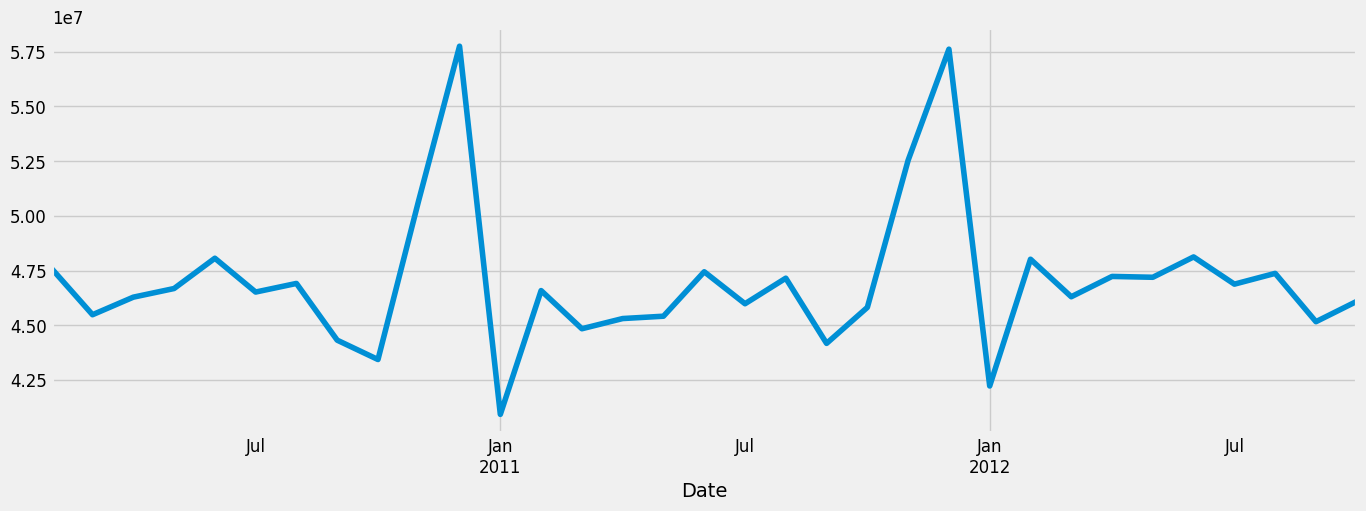

In [335]:
y.plot(figsize=(15, 5))